In [382]:
import numpy as np
import matplotlib.pyplot as plt

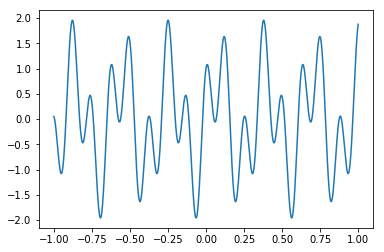

In [383]:
def h(x):
    if x < -1 or x > 1:
        y = 0
    else:
        y = (np.cos(50*x) + np.sin(20*x))
    return y

hv = np.vectorize(h)

x = np.linspace(-1, 1, num=1000)
plt.plot(x, hv(x))

In [373]:
def simple_greedy_search(func, start=0, N=100):
    x=start
    history=[]
    for i in range(N):
        history.append(x)
        u = 0.001
        xleft, xright = x-u, x+u
        yleft, yright = func(xleft),func(xright)
        if yleft > yright:
            x = xright
        else:
            x=xright
    return x, history

In [376]:
x0, history = simple_greedy_search(hv, start=0, N=100)

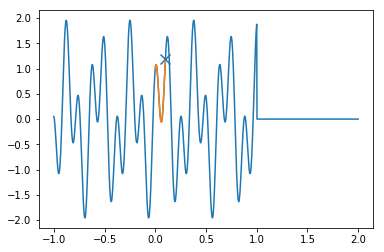

In [378]:
plt.plot(x, hv(x))
plt.scatter(x0, h(x0), marker='x', s=100)
plt.plot(history, hv(history))

In [379]:
def SA(search_space, func, T):
    scale = np.sqrt(T)
    start=np.random.choice(search_space)
    x=start*1
    cur=func(x)
    history = [x]
    for i in range(1000):
        prop = x+np.random.normal()*scale
        if prop >1 or prop <0 or np.log(np.random.rand())*T>(func(prop)*cur):
            prop =x
        x=prop
        cur=func(x)
        T=0.9*T
        history.append(x)
    return x, history

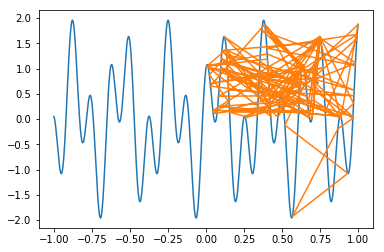

In [380]:
x= np.linspace(-1,1, num=1000000)
x1, history=SA(x,h, T=4)

plt.plot(x,hv(x))
plt.scatter(x1,hv(x1),marker='x')
plt.plot(history,hv(history))

In [386]:
h(history[-1])

0.774513182848672